In [80]:
import pandas as pd
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
data=pd.read_excel('Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df=data.copy()

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df['total cost']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
print('quantity less than 0: ',(df['Quantity']<=0).sum())
print('unitprice less than 0: ',(df['UnitPrice']<=0).sum())

quantity less than 0:  8905
unitprice less than 0:  40


In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [11]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
df['Data']=df['InvoiceDate'].apply(lambda x:x.date())
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total cost,Data
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [13]:
df['year']=df['InvoiceDate'].apply(lambda x:x.year)
df['month']=df['InvoiceDate'].apply(lambda x:x.month)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total cost,Data,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12


In [14]:
calender=df.groupby(['year','month']).sum()
calender

Quantity   UnitPrice   CustomerID   total cost
year month                                                
2010 12       312265   81935.610  406196835.0   572713.890
2011 1        349098   66964.990  321863240.0   569445.040
     2        265622   63185.760  305207531.0   447137.350
     3        348503   88563.100  412653906.0   595500.760
     4        292222   79005.481  345925717.0   469200.361
     5        373601  102128.280  431128726.0   678594.560
     6        363699   85274.730  416663110.0   661213.690
     7        369420   75919.901  410674538.0   600091.011
     8        398121   79423.830  412055398.0   645343.900
     9        544897  119053.062  610865157.0   952838.382
     10       593900  165849.980  755877847.0  1039318.790
     11       669051  185522.460  991300319.0  1161817.380
     12       287413   47173.430  264994057.0   518192.790

In [15]:
recency_df=df.groupby(by='CustomerID',as_index=False)['Data'].max()
recency_df.columns=['CustomerID','lastpurchased']
recency_df

,CustomerID,lastpurchased
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4333,18280.0,2011-03-07
4334,18281.0,2011-06-12
4335,18282.0,2011-12-02
4336,18283.0,2011-12-06


In [16]:
current_day=dt.date.today()
current_day

datetime.date(2023, 12, 17)

In [17]:
recency_df['recency']=recency_df['lastpurchased'].apply(lambda x:(current_day-x).days)
recency_df

,CustomerID,lastpurchased,recency
0,12346.0,2011-01-18,4716
1,12347.0,2011-12-07,4393
2,12348.0,2011-09-25,4466
3,12349.0,2011-11-21,4409
4,12350.0,2011-02-02,4701
...,...,...,...
4333,18280.0,2011-03-07,4668
4334,18281.0,2011-06-12,4571
4335,18282.0,2011-12-02,4398
4336,18283.0,2011-12-06,4394


In [18]:
freq=df.groupby(by='CustomerID',as_index=False)['InvoiceNo'].count()
freq.columns=['CustomerID','freq']
freq

,CustomerID,freq
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,756


In [19]:
mony=df.groupby(by='CustomerID',as_index=False)['total cost'].sum()
mony.columns=['CustomerID','Total Quantity']
mony

,CustomerID,Total Quantity
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [84]:
rfm=recency_df.merge(mony).merge(freq)
rfm['country']=df['Country']
rfm.drop('lastpurchased',axis=1,inplace=True)
#rfm.set_index('CustomerID',inplace=True)
rfm

,CustomerID,recency,Total Quantity,freq,country
0,12346.0,4716,77183.60,1,United Kingdom
1,12347.0,4393,4310.00,182,United Kingdom
2,12348.0,4466,1797.24,31,United Kingdom
3,12349.0,4409,1757.55,73,United Kingdom
4,12350.0,4701,334.40,17,United Kingdom
...,...,...,...,...,...
4333,18280.0,4668,180.60,10,United Kingdom
4334,18281.0,4571,80.82,7,United Kingdom
4335,18282.0,4398,178.05,12,United Kingdom
4336,18283.0,4394,2094.88,756,United Kingdom


In [76]:
rfm['country'].value_counts()

United Kingdom    2971
Norway              73
EIRE                21
France              20
Germany             15
Australia           14
Netherlands          2
Name: country, dtype: int64

In [95]:
la=LabelEncoder()
rfm['country']=la.fit_transform(rfm['country'])
rfm['country'].value_counts()

6    2971
7    1222
5      73
1      21
2      20
3      15
0      14
4       2
Name: country, dtype: int64

In [96]:
y=rfm['country']
x=rfm.drop(['country'],axis=1)
column=x.columns

def fit(self, x, y):
        from sklearn.utils import compute_class_weight

        label_encoder = LabelEncoder().fit(y)
        classes = label_encoder.classes_
        class_weight = compute_class_weight(self.class_weight, classes, y)

        # Intentionally modify the balanced class_weight
        # to simulate a bug and raise an exception
        if self.class_weight == "balanced":
            class_weight += 1.

        # Simply assigning coef_ to the class_weight
        self.coef_ = class_weight
        return self 

<AxesSubplot:>

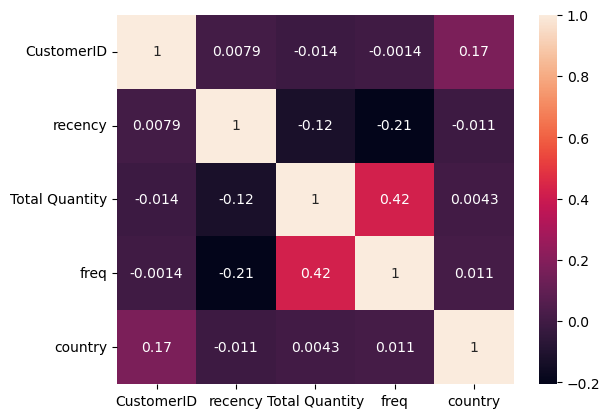

In [97]:
sns.heatmap(rfm.corr(),annot=True)

In [93]:
y.value_counts()

United Kingdom    2971
Norway              73
EIRE                21
France              20
Germany             15
Australia           14
Netherlands          2
Name: country, dtype: int64

In [98]:
rfm.isna().sum()

CustomerID        0
recency           0
Total Quantity    0
freq              0
country           0
dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import  torch
import torch.nn as nn

In [100]:
scs=StandardScaler()
x=scs.fit_transform(x)
x=pd.DataFrame(x,columns=column)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (3036, 4)
x_test shape:  (1302, 4)
y_train shape:  (3036,)
y_test shape:  (1302,)


In [131]:
len(y.value_counts())

8

In [141]:
model=Sequential()
model.add(layers.Dense(255,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='relu'))
model.add(layers.Dense(1,activation='relu'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 255)               1275      
                                                                 
 dense_63 (Dense)            (None, 128)               32768     
                                                                 
 dense_64 (Dense)            (None, 10)                1290      
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
 dense_66 (Dense)            (None, 1)                 2         
                                                                 
Total params: 35,346
Trainable params: 35,346
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
95/95 [==============================] - 1s 6ms/step - loss: 2.4292 - val_loss: 0.5214
Epoch 2/15
95/95 [==============================] - 0s 3ms/step - loss: 0.6441 - val_loss: 0.5828
Epoch 3/15
95/95 [==============================] - 0s 4ms/step - loss: 0.6210 - val_loss: 0.4177
Epoch 4/15
95/95 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.3968
Epoch 5/15
95/95 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 0.3838
Epoch 6/15
95/95 [==============================] - 0s 4ms/step - loss: 0.6070 - val_loss: 0.3893
Epoch 7/15
95/95 [==============================] - 0s 4ms/step - loss: 0.5854 - val_loss: 0.3975
Epoch 8/15
95/95 [==============================] - 0s 3ms/step - loss: 0.5803 - val_loss: 0.4405
Epoch 9/15
95/95 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.4105
Epoch 10/15
95/95 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.3826
Epoch 11/15
95/95 [

In [143]:
preds=model.predict(x_test).reshape(-1)
preds

41/41 [==============================] - 0s 2ms/step


array([5.365726 , 5.910179 , 5.9714355, ..., 6.5912685, 6.531447 ,
       6.306359 ], dtype=float32)

In [144]:
pred=[]
for i in preds:
    if i>=6.5:
        pred.append(7)
    elif 6.5>i>=5.5:
        pred.append(6)
    elif 5.5>i>=4.5:
        pred.append(5)
    elif 4.5>i>=3.5:
        pred.append(4)
    elif 3.5>i>=2.5:
        pred.append(3)
    elif 2.5>i>=1.5:
        pred.append(2)
    elif 1.5>i>=.5:
        pred.append(1)
    elif .5>i>=0:
        pred.append(0)
pred
        
        

[5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 7,
 6,
 7,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 5,
 6,
 7,
 5,
 6,
 7,
 7,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 7,
 6,
 7,
 6,
 5,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 5,
 5,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 7,
 6,
 7,
 6,
 7,
 7,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 5,
 6,
 5,
 7,
 6,
 6,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 7,
 6,
 5,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,


In [145]:
res=pd.DataFrame()
res['actual']=y_test.values
res['preds']=preds
res['pred']=pred
res.head(20)

,actual,preds,pred
0,6,5.365726,5
1,6,5.910179,6
2,6,5.971436,6
3,7,6.478128,6
4,6,5.678441,6
5,6,6.352155,6
6,6,6.000309,6
7,7,6.619615,7
8,7,6.512206,7
9,6,6.030263,6
